Import Packages

In [2]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

Load the Data

In [3]:
parent_dir = '../../data/philosopher/'

N = 10_000
M = 100
ITERATIONS = 10
# Load Scala benchmark data
scala_idle_raw_data = pd.read_csv(f'{parent_dir}7/philosopher_akka_actor_benchmark_idle_power.csv')
scala_bench_raw_data = pd.read_csv(f'{parent_dir}7/philosopher_akka_actor_benchmark_power_metrics.csv')

# Load Erlang benchmark data
erlang_idle_raw_data = pd.read_csv(f'{parent_dir}7/philosopher_benchmark_idle_power.csv')
erlang_bench_raw_data = pd.read_csv(f'{parent_dir}7/philosopher_benchmark_power_metrics.csv')

# Replace empty or missing values with "N/A" in non-numeric columns
scala_idle_raw_data.fillna("N/A", inplace=True)
scala_bench_raw_data.fillna("N/A", inplace=True)
erlang_idle_raw_data.fillna("N/A", inplace=True)
erlang_bench_raw_data.fillna("N/A", inplace=True)

Preview the Data

In [4]:
print("Scala Idle Raw Data:")
print(scala_idle_raw_data.shape)
scala_idle_raw_data.head()

Scala Idle Raw Data:
(10, 9)


,Timestamp,CPU Core Power(W),GT Power(W),DRAM Power(W),(CPUs+GT+SA) Power(W),Avg Num Cores Active,Cores Active(%),CPU Temp(C),Pressure Level
0,(Mon Mar 31 08:54:13 2025 +0200) (511.75ms ela...,0.0836,0.0000,0.287,0.21,0.04,3.10,58.71 C,Nominal
1,(Mon Mar 31 08:54:13 2025 +0200) (507.86ms ela...,0.1040,0.0305,0.338,0.22,0.06,4.19,59.49 C,Nominal
2,(Mon Mar 31 08:54:14 2025 +0200) (507.56ms ela...,1.1600,0.0000,0.299,1.27,0.20,15.34,59.49 C,Nominal
3,(Mon Mar 31 08:54:14 2025 +0200) (508.78ms ela...,0.0553,0.0000,0.249,0.11,0.03,2.39,59.23 C,Nominal
4,(Mon Mar 31 08:54:15 2025 +0200) (508.66ms ela...,0.1140,0.0000,0.282,0.18,0.07,5.05,59.23 C,Nominal


In [5]:
print("Scala Benchmark Raw Data:")
print(scala_bench_raw_data.shape)
scala_bench_raw_data.head()

Scala Benchmark Raw Data:
(193, 9)


,Timestamp,CPU Core Power(W),GT Power(W),DRAM Power(W),(CPUs+GT+SA) Power(W),Avg Num Cores Active,Cores Active(%),CPU Temp(C),Pressure Level
0,(Mon Mar 31 08:54:24 2025 +0200) (109.57ms ela...,38.0,0.0,1.98,39.45,3.98,99.71,56.92 C,Nominal
1,(Mon Mar 31 08:54:24 2025 +0200) (105.28ms ela...,37.5,0.0,1.64,38.56,3.99,99.87,56.92 C,Nominal
2,(Mon Mar 31 08:54:24 2025 +0200) (105.32ms ela...,37.3,0.0,1.68,38.27,3.97,99.52,56.92 C,Nominal
3,(Mon Mar 31 08:54:24 2025 +0200) (105.98ms ela...,38.0,0.0,2.06,39.37,4.00,99.96,57.77 C,Nominal
4,(Mon Mar 31 08:54:24 2025 +0200) (105.47ms ela...,36.4,0.0,1.85,37.69,3.97,99.53,57.77 C,Nominal


In [6]:
print("Erlang Idle Raw Data:")
print(erlang_idle_raw_data.shape)
erlang_idle_raw_data.head()

Erlang Idle Raw Data:
(10, 9)


,Timestamp,CPU Core Power(W),GT Power(W),DRAM Power(W),(CPUs+GT+SA) Power(W),Avg Num Cores Active,Cores Active(%),CPU Temp(C),Pressure Level
0,(Mon Mar 31 08:51:05 2025 +0200) (510.76ms ela...,0.132,0.0000,0.247,0.18,0.04,2.63,46.11 C,Nominal
1,(Mon Mar 31 08:51:06 2025 +0200) (508.82ms ela...,0.671,0.0359,0.397,0.81,0.15,11.53,46.11 C,Nominal
2,(Mon Mar 31 08:51:06 2025 +0200) (506.28ms ela...,0.587,0.0000,0.272,0.67,0.10,7.59,46.46 C,Nominal
3,(Mon Mar 31 08:51:07 2025 +0200) (507.42ms ela...,5.600,0.0000,0.389,6.11,1.11,99.94,46.46 C,Nominal
4,(Mon Mar 31 08:51:07 2025 +0200) (506.43ms ela...,1.940,0.0000,0.451,2.24,0.42,39.29,46.45 C,Nominal


In [7]:
print("Erlang Benchmark Raw Data:")
print(erlang_bench_raw_data.shape)
erlang_bench_raw_data.head()

Erlang Benchmark Raw Data:
(501, 9)


,Timestamp,CPU Core Power(W),GT Power(W),DRAM Power(W),(CPUs+GT+SA) Power(W),Avg Num Cores Active,Cores Active(%),CPU Temp(C),Pressure Level
0,(Mon Mar 31 08:51:16 2025 +0200) (109.65ms ela...,24.0,0.0,0.852,24.89,3.31,95.81,45.88 C,Nominal
1,(Mon Mar 31 08:51:16 2025 +0200) (105.00ms ela...,23.7,0.0,0.792,24.46,3.29,96.21,45.88 C,Nominal
2,(Mon Mar 31 08:51:17 2025 +0200) (105.42ms ela...,23.3,0.0,0.813,23.99,3.20,95.52,45.88 C,Nominal
3,(Mon Mar 31 08:51:17 2025 +0200) (105.94ms ela...,23.4,0.0,0.848,24.24,3.23,95.92,45.88 C,Nominal
4,(Mon Mar 31 08:51:17 2025 +0200) (106.35ms ela...,23.3,0.0,0.791,23.91,3.23,95.94,45.88 C,Nominal


Clean the Data

In [8]:
def clean_data(df):
    df_copy = df.copy() 
    
    # Convert Timestamp to datetime format (extract date-time pattern)
    df_copy['Timestamp'] = pd.to_datetime(
        df['Timestamp'].str.extract(r'(\w{3} \w{3} \d{1,2} \d{2}:\d{2}:\d{2} \d{4})')[0], 
        errors='coerce'
    )

    # Extract elapsed time in milliseconds
    df_copy['Time Elapsed (ms)'] = pd.to_numeric(
        df['Timestamp'].str.extract(r'\((\d+\.\d+)ms elapsed\)')[0], 
        errors='coerce'
    )
    
    # Extract numeric temperature values
    df_copy['CPU Temp(C)'] = df['CPU Temp(C)'].str.extract(r'(\d+\.\d+|\d+)').astype(float)

    # Fill N/A values with 0 for numerical columns
    df_copy = df_copy.fillna(0)
    
    return df_copy

In [9]:
scala_idle_data = clean_data(scala_idle_raw_data)
scala_bench_data = clean_data(scala_bench_raw_data)
erlang_idle_data = clean_data(erlang_idle_raw_data)
erlang_bench_data = clean_data(erlang_bench_raw_data)

Verify Cleaned Data

In [10]:
print("Scala Idle Clean Data:")
print(scala_idle_data.shape)
scala_idle_data.head()

Scala Idle Clean Data:
(10, 10)


,Timestamp,CPU Core Power(W),GT Power(W),DRAM Power(W),(CPUs+GT+SA) Power(W),Avg Num Cores Active,Cores Active(%),CPU Temp(C),Pressure Level,Time Elapsed (ms)
0,2025-03-31 08:54:13,0.0836,0.0000,0.287,0.21,0.04,3.10,58.71,Nominal,511.75
1,2025-03-31 08:54:13,0.1040,0.0305,0.338,0.22,0.06,4.19,59.49,Nominal,507.86
2,2025-03-31 08:54:14,1.1600,0.0000,0.299,1.27,0.20,15.34,59.49,Nominal,507.56
3,2025-03-31 08:54:14,0.0553,0.0000,0.249,0.11,0.03,2.39,59.23,Nominal,508.78
4,2025-03-31 08:54:15,0.1140,0.0000,0.282,0.18,0.07,5.05,59.23,Nominal,508.66


In [11]:
print("Scala Benchmark Clean Data:")
print(scala_bench_data.shape)
scala_bench_data.head()


Scala Benchmark Clean Data:
(193, 10)


,Timestamp,CPU Core Power(W),GT Power(W),DRAM Power(W),(CPUs+GT+SA) Power(W),Avg Num Cores Active,Cores Active(%),CPU Temp(C),Pressure Level,Time Elapsed (ms)
0,2025-03-31 08:54:24,38.0,0.0,1.98,39.45,3.98,99.71,56.92,Nominal,109.57
1,2025-03-31 08:54:24,37.5,0.0,1.64,38.56,3.99,99.87,56.92,Nominal,105.28
2,2025-03-31 08:54:24,37.3,0.0,1.68,38.27,3.97,99.52,56.92,Nominal,105.32
3,2025-03-31 08:54:24,38.0,0.0,2.06,39.37,4.00,99.96,57.77,Nominal,105.98
4,2025-03-31 08:54:24,36.4,0.0,1.85,37.69,3.97,99.53,57.77,Nominal,105.47


In [12]:
print("Erlang Idle Clean Data:")
print(erlang_idle_data.shape)
erlang_idle_data.head()


Erlang Idle Clean Data:
(10, 10)


,Timestamp,CPU Core Power(W),GT Power(W),DRAM Power(W),(CPUs+GT+SA) Power(W),Avg Num Cores Active,Cores Active(%),CPU Temp(C),Pressure Level,Time Elapsed (ms)
0,2025-03-31 08:51:05,0.132,0.0000,0.247,0.18,0.04,2.63,46.11,Nominal,510.76
1,2025-03-31 08:51:06,0.671,0.0359,0.397,0.81,0.15,11.53,46.11,Nominal,508.82
2,2025-03-31 08:51:06,0.587,0.0000,0.272,0.67,0.10,7.59,46.46,Nominal,506.28
3,2025-03-31 08:51:07,5.600,0.0000,0.389,6.11,1.11,99.94,46.46,Nominal,507.42
4,2025-03-31 08:51:07,1.940,0.0000,0.451,2.24,0.42,39.29,46.45,Nominal,506.43


In [13]:
print("Erlang Benchmark Clean Data:")
print(erlang_bench_data.shape)
erlang_bench_data.head()

Erlang Benchmark Clean Data:
(501, 10)


,Timestamp,CPU Core Power(W),GT Power(W),DRAM Power(W),(CPUs+GT+SA) Power(W),Avg Num Cores Active,Cores Active(%),CPU Temp(C),Pressure Level,Time Elapsed (ms)
0,2025-03-31 08:51:16,24.0,0.0,0.852,24.89,3.31,95.81,45.88,Nominal,109.65
1,2025-03-31 08:51:16,23.7,0.0,0.792,24.46,3.29,96.21,45.88,Nominal,105.00
2,2025-03-31 08:51:17,23.3,0.0,0.813,23.99,3.20,95.52,45.88,Nominal,105.42
3,2025-03-31 08:51:17,23.4,0.0,0.848,24.24,3.23,95.92,45.88,Nominal,105.94
4,2025-03-31 08:51:17,23.3,0.0,0.791,23.91,3.23,95.94,45.88,Nominal,106.35


Visualize the Data

In [14]:
def plot_graphs(idle_df, bench_df, title_prefix):
    """
    Creates side-by-side subplots for each metric, plotting idle (left) and benchmark (right),
    using elapsed time on the x-axis.
    """
    columns_to_plot = [
        "CPU Core Power(W)", "GT Power(W)", "DRAM Power(W)", 
        "(CPUs+GT+SA) Power(W)", "Avg Num Cores Active", "CPU Temp(C)"
    ]

    sns.set_theme(style="whitegrid", palette="muted")

    # Create a copy of the dataframes to avoid modifying the original data
    idle_df = idle_df.copy()
    bench_df = bench_df.copy()
    

    # Compute elapsed time starting from t=0
    idle_df["Elapsed Time (s)"] = (idle_df["Time Elapsed (ms)"].cumsum() - idle_df["Time Elapsed (ms)"].iloc[0]) / 1000
    bench_df["Elapsed Time (s)"] = (bench_df["Time Elapsed (ms)"].cumsum() - bench_df["Time Elapsed (ms)"].iloc[0]) / 1000

    for column in columns_to_plot:
        fig, axes = plt.subplots(1, 2, figsize=(12, 5))

        # Plot Idle data on the first subplot
        sns.lineplot(data=idle_df, x="Elapsed Time (s)", y=column, label="Idle", color='blue', linestyle='--', ax=axes[0])
        axes[0].set_title(f"Idle - {column}", fontsize=12)
        axes[0].set_xlabel("Elapsed Time (s)", fontsize=10)
        axes[0].set_ylabel(column, fontsize=10)
        axes[0].legend()
        axes[0].grid(True)

        # Plot Benchmark data on the second subplot
        sns.lineplot(data=bench_df, x="Elapsed Time (s)", y=column, label="Benchmark", color='red', ax=axes[1])
        axes[1].set_title(f"Benchmark - {column}", fontsize=12)
        axes[1].set_xlabel("Elapsed Time (s)", fontsize=10)
        axes[1].set_ylabel(column, fontsize=10)
        axes[1].legend()
        axes[1].grid(True)

        # Main figure title
        fig.suptitle(f"{title_prefix} - {column}", fontsize=14)
        
        # Adjust layout to avoid overlap
        plt.tight_layout(rect=[0, 0, 1, 0.95]) 
        plt.show()


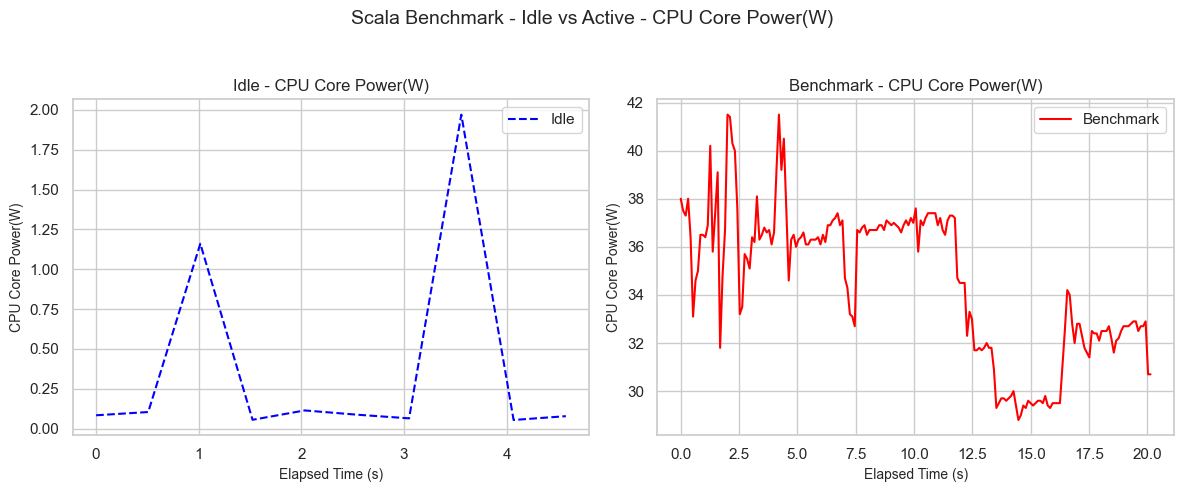

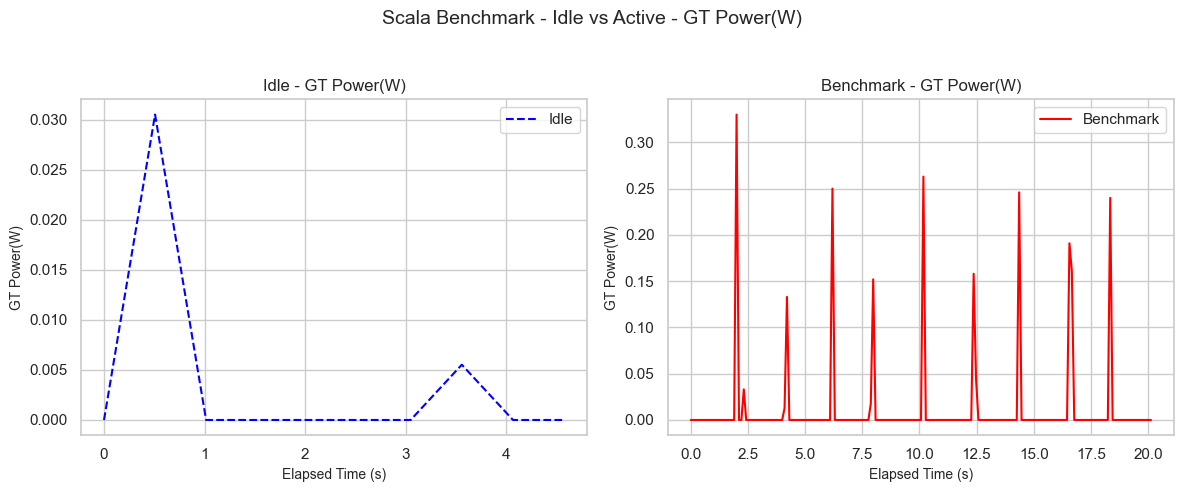

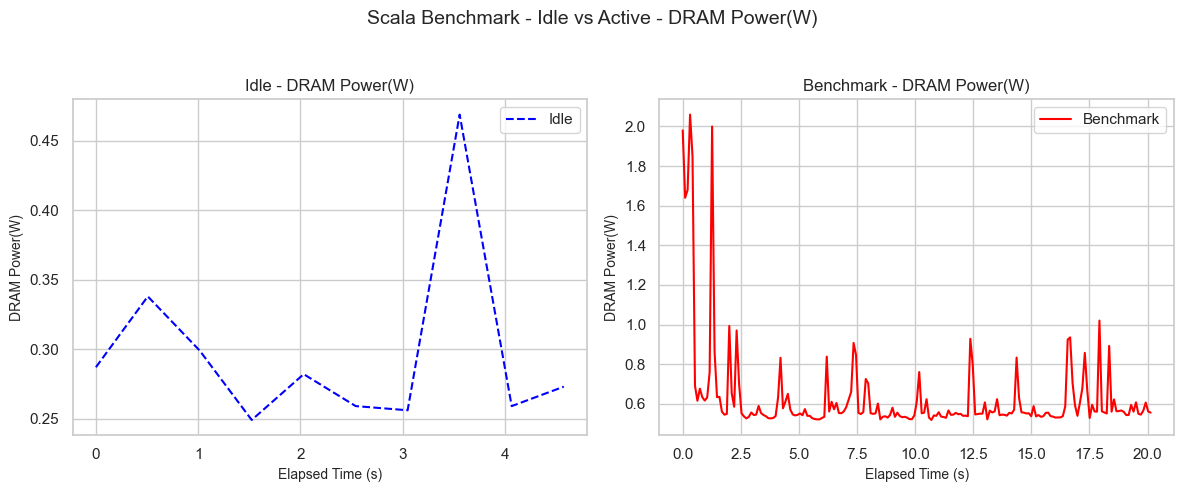

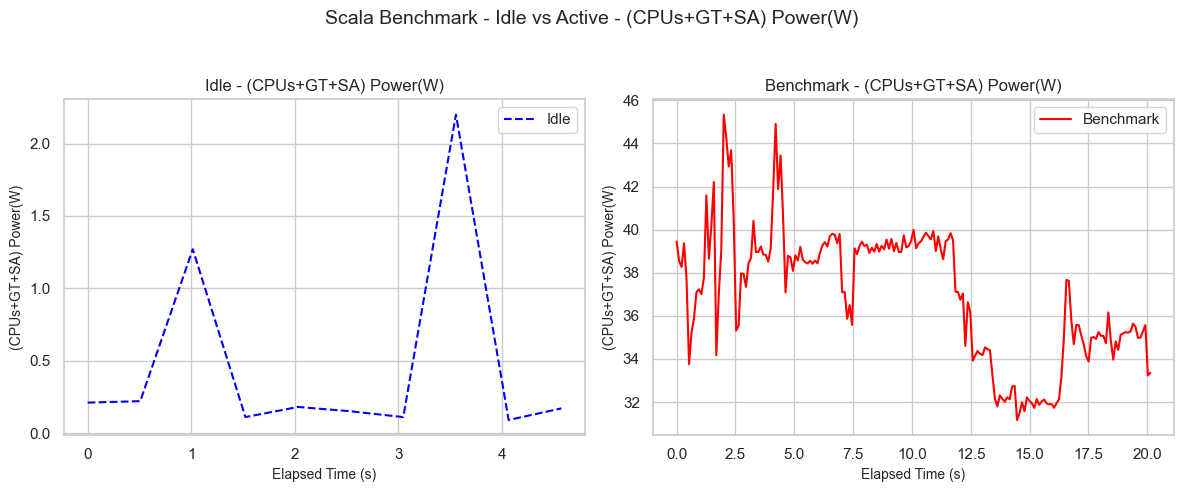

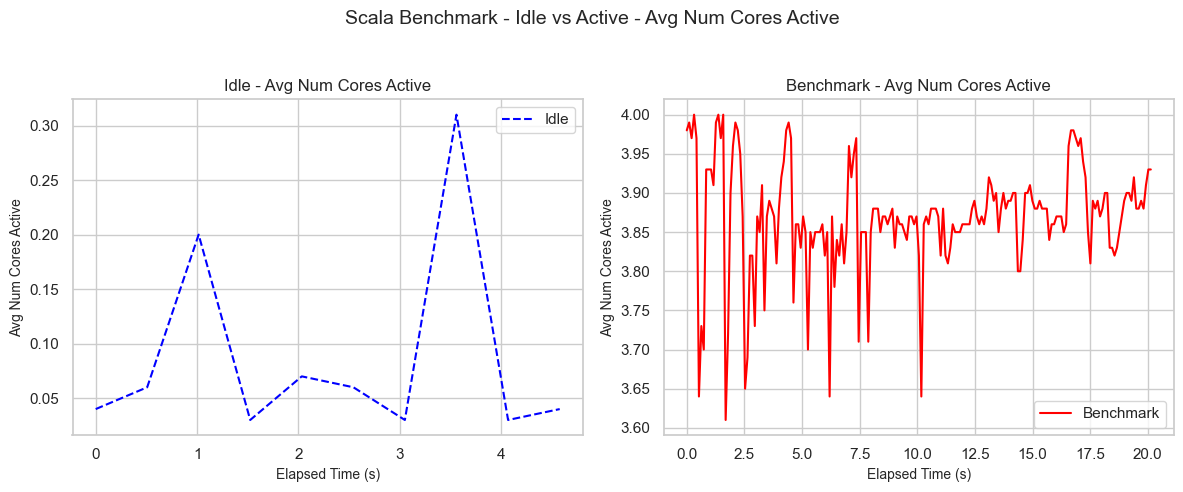

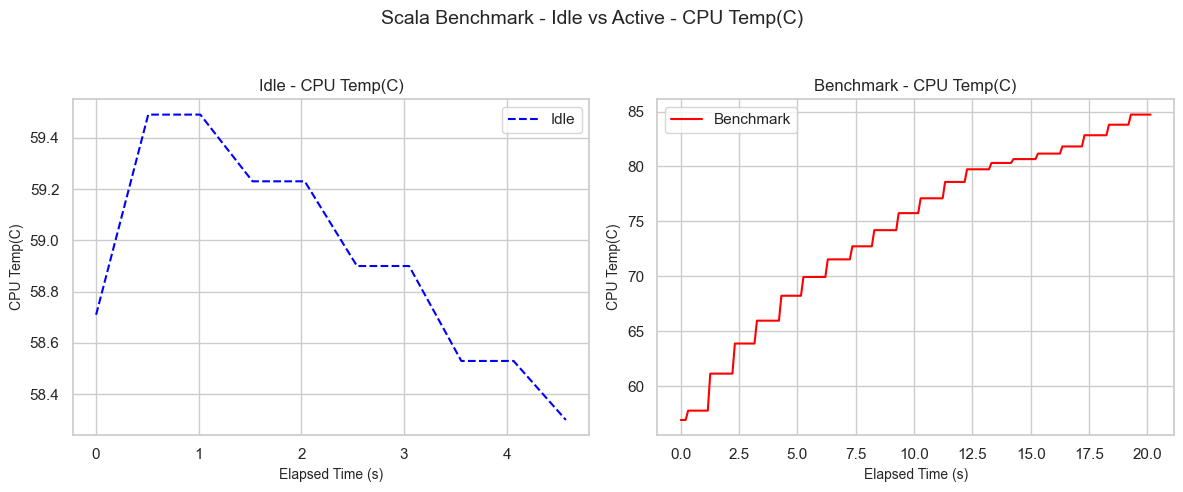

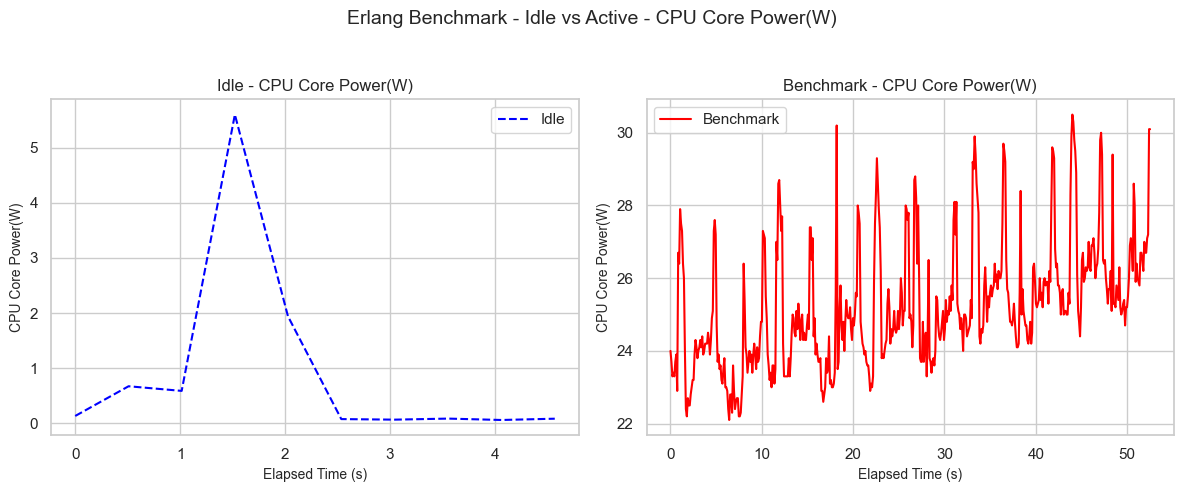

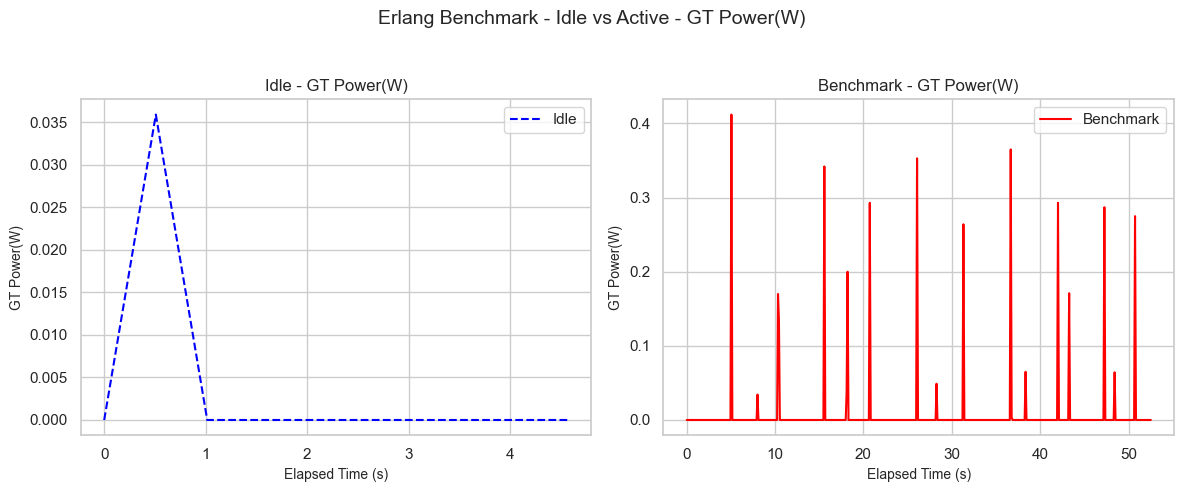

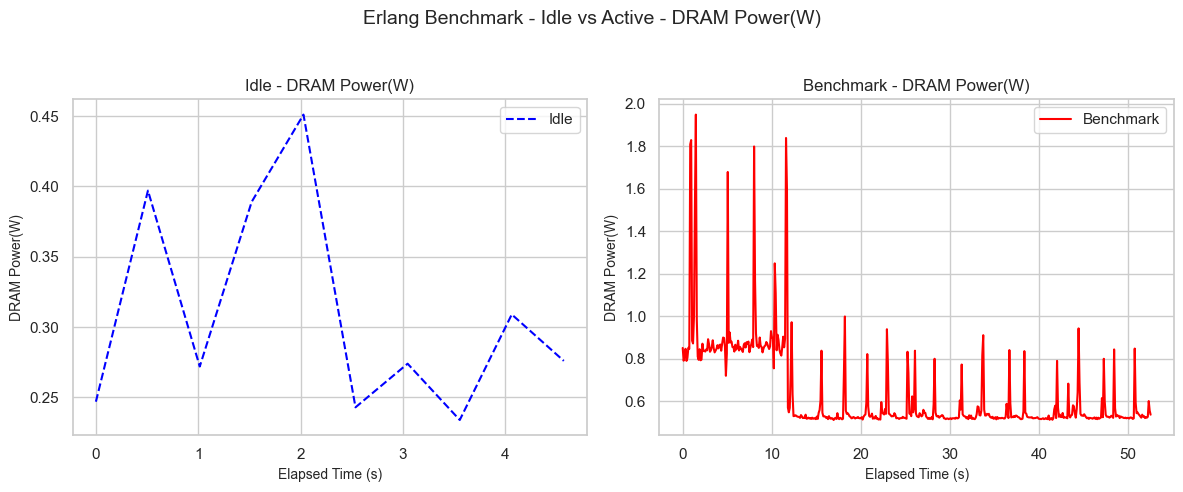

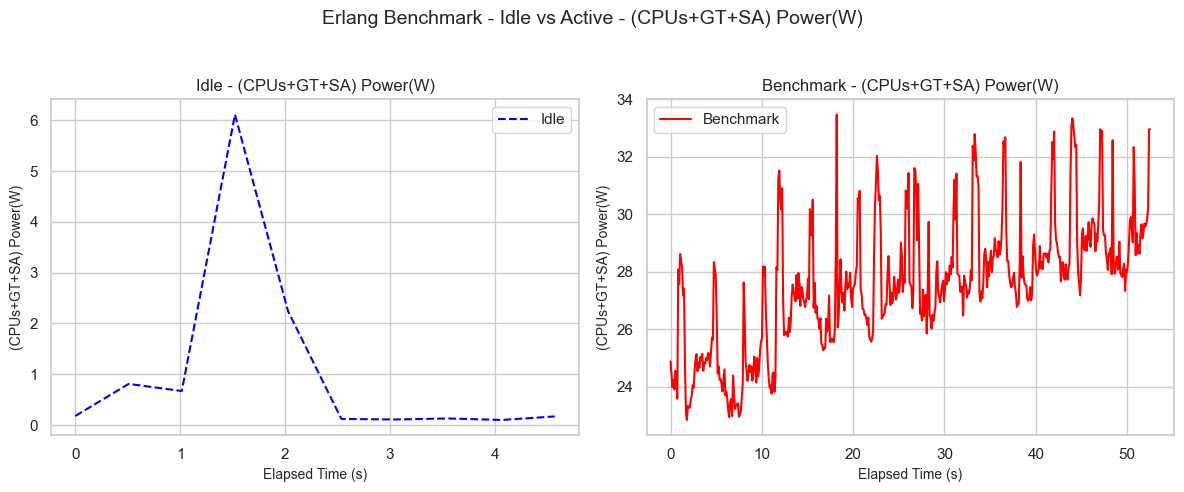

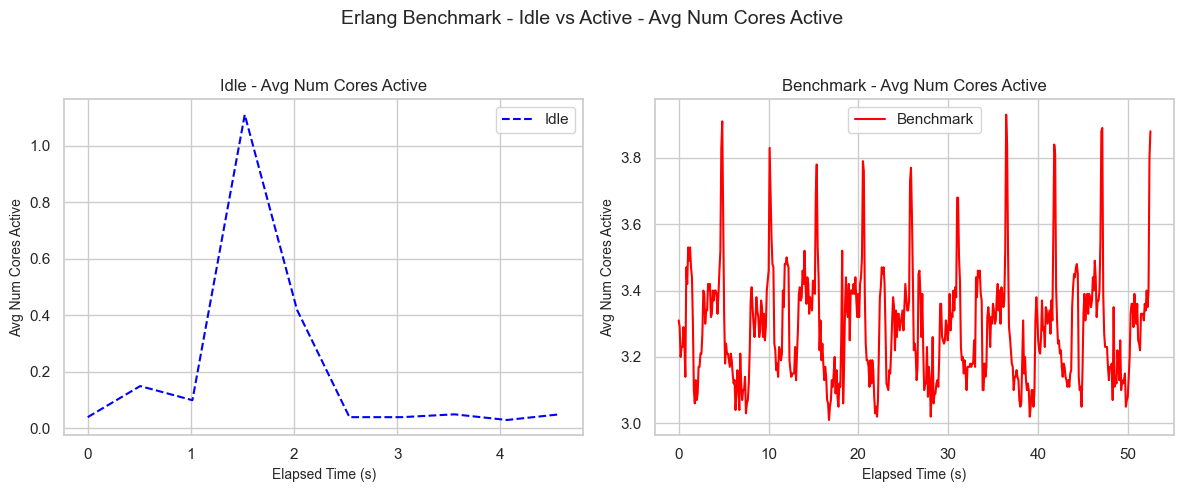

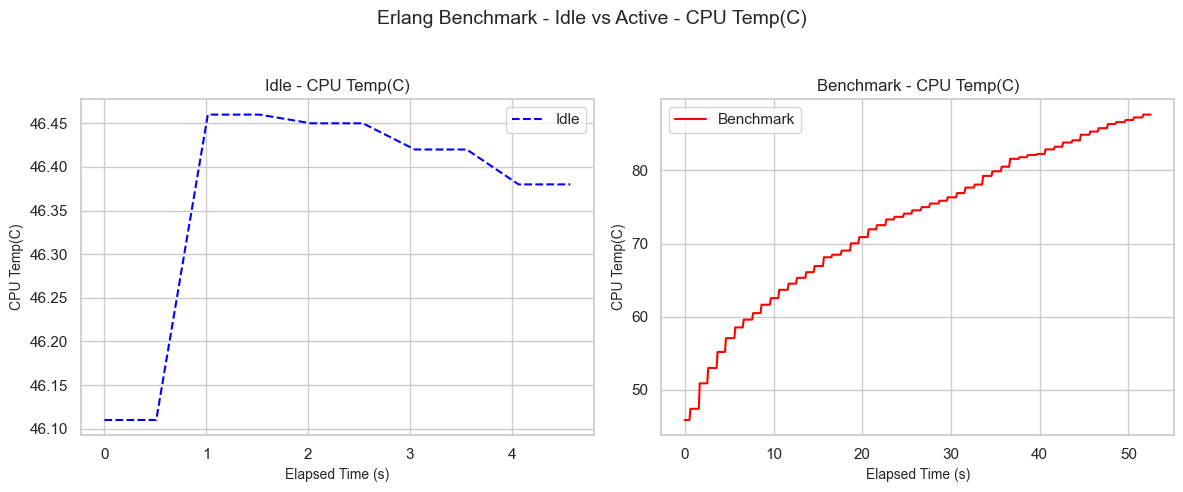

In [15]:
plot_graphs(scala_idle_data, scala_bench_data, "Scala Benchmark - Idle vs Active")
plot_graphs(erlang_idle_data, erlang_bench_data, "Erlang Benchmark - Idle vs Active")

In [16]:
def plot_erlang_vs_scala(erlang_df, scala_df, idle_erlang_df, idle_scala_df, title_prefix):
    """
    Plots Erlang and Scala benchmark data with elapsed time starting at t=0,
    after subtracting corresponding idle values.
    """
    columns_to_plot = [
        "CPU Core Power(W)", "GT Power(W)", "DRAM Power(W)", 
        "(CPUs+GT+SA) Power(W)", "Avg Num Cores Active", "CPU Temp(C)"
    ]

    sns.set_theme(style="whitegrid", palette="muted")

    # Create a copy of the dataframes to avoid modifying the original data
    erlang_df = erlang_df.copy()
    scala_df = scala_df.copy()

    # Normalize elapsed time to start from t=0
    erlang_df["Elapsed Time (s)"] = (erlang_df["Time Elapsed (ms)"].cumsum() - erlang_df["Time Elapsed (ms)"].iloc[0]) / 1000
    scala_df["Elapsed Time (s)"] = (scala_df["Time Elapsed (ms)"].cumsum() - scala_df["Time Elapsed (ms)"].iloc[0]) / 1000


    for column in columns_to_plot:
        fig, ax = plt.subplots(figsize=(10, 5))

        # Subtract idle values
        erlang_df["Adjusted " + column] = np.maximum(0, erlang_df[column] - idle_erlang_df[column].mean())
        scala_df["Adjusted " + column] = np.maximum(0, scala_df[column] - idle_scala_df[column].mean())

        # Plot Erlang benchmark
        sns.lineplot(data=erlang_df, x="Elapsed Time (s)", y="Adjusted " + column, label="Erlang", color='blue', ax=ax)

        # Plot Scala benchmark
        sns.lineplot(data=scala_df, x="Elapsed Time (s)", y="Adjusted " + column, label="Scala", color='red', ax=ax)

        # Main figure title
        ax.set_title(f"{title_prefix} - {column}", fontsize=14)
        ax.set_xlabel("Elapsed Time (s)", fontsize=12)
        ax.set_ylabel(column, fontsize=12)
        ax.legend()
        ax.grid(True)

        plt.tight_layout()
        plt.show()


In [17]:
def format_number_str(num):
    """Formats large numbers into shortened notation (e.g., 1B, 100M, 10M)."""
    if num >= 1_000_000_000:
        return f"{num // 1_000_000_000}B"
    elif num >= 1_000_000:
        return f"{num // 1_000_000}M"
    elif num >= 1_000:
        return f"{num // 1_000}K"
    return str(num)

n = format_number_str(N)
m = format_number_str(M)
title_config_prefix = f"({n} Philosophers, {m} Eating Rounds, {ITERATIONS} Iterations)"

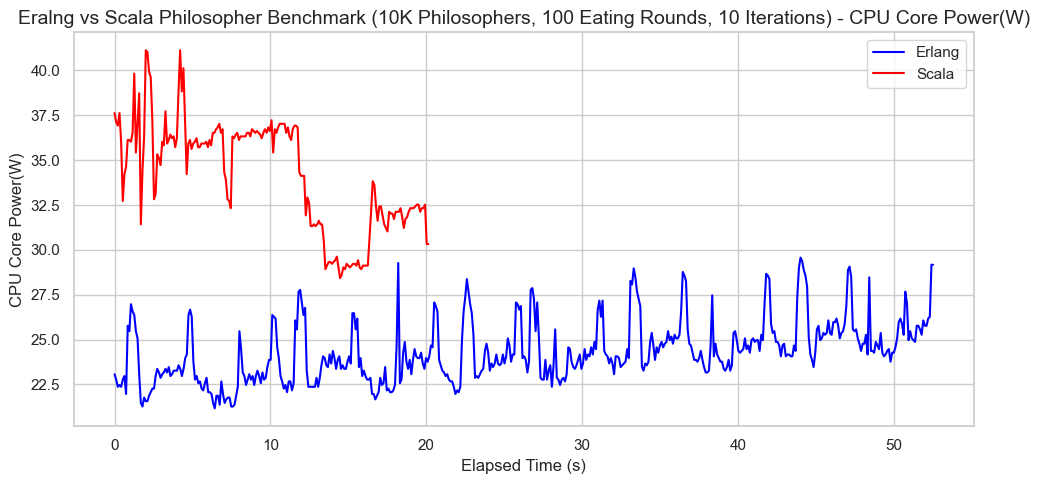

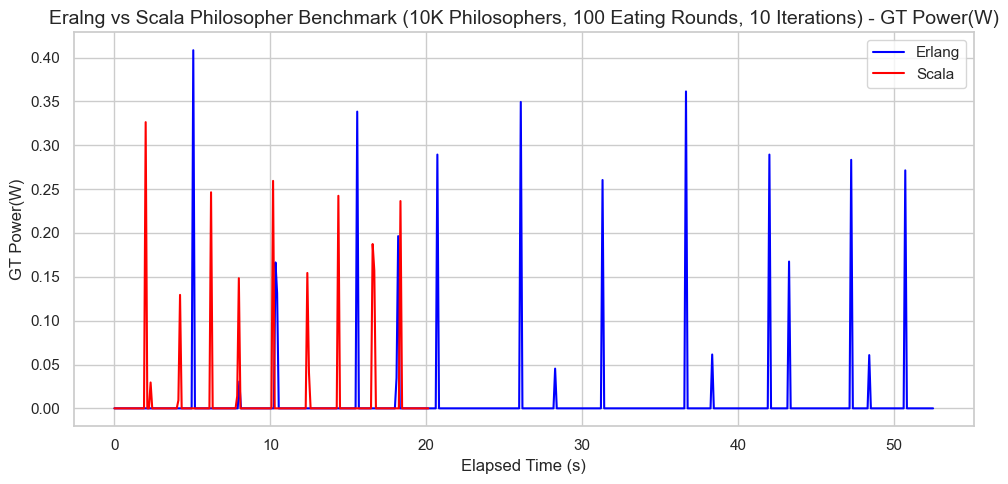

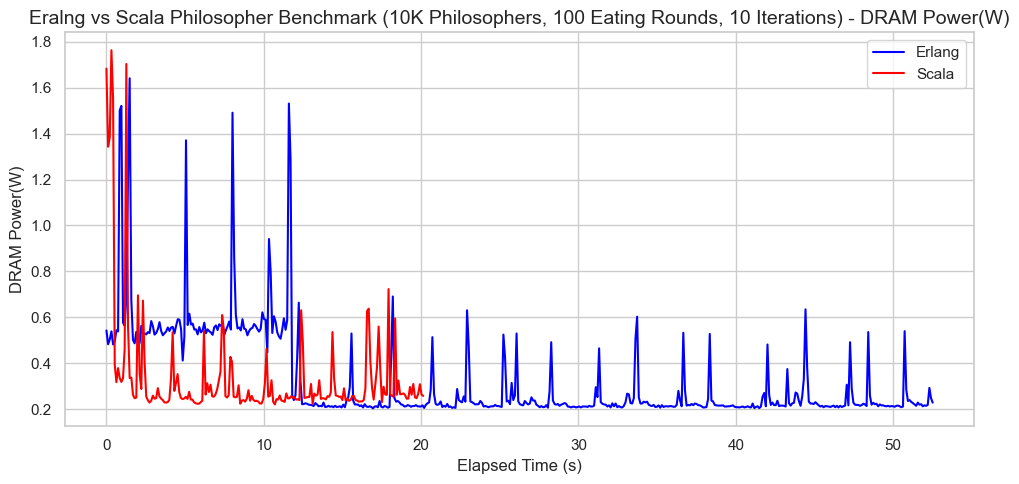

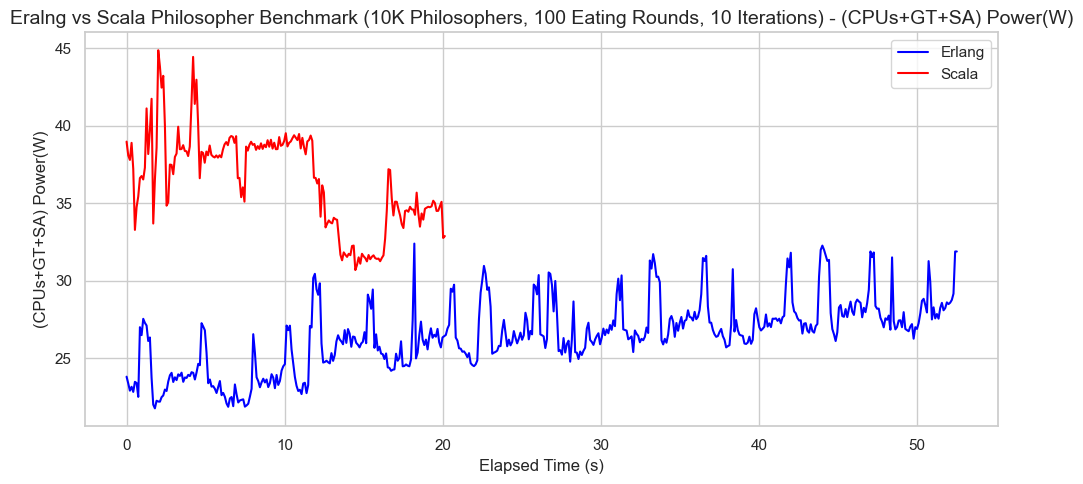

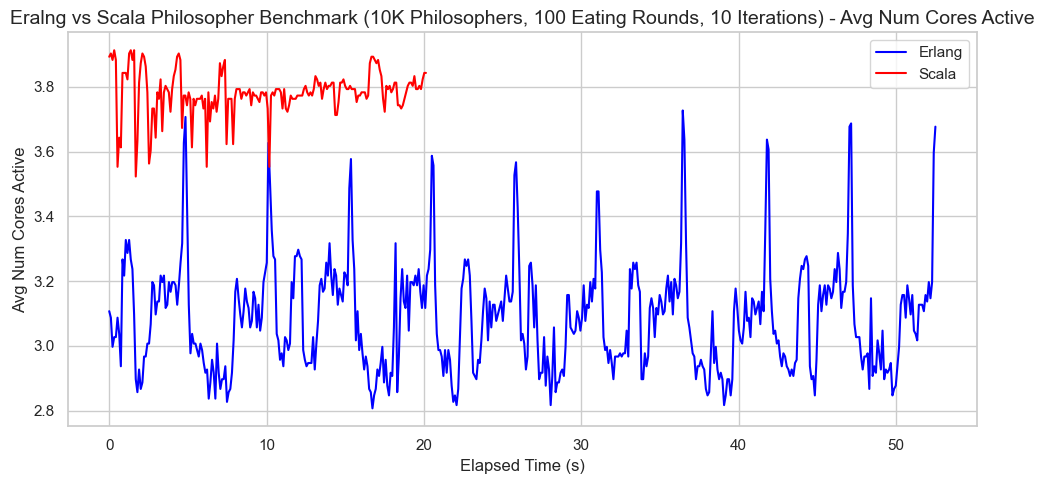

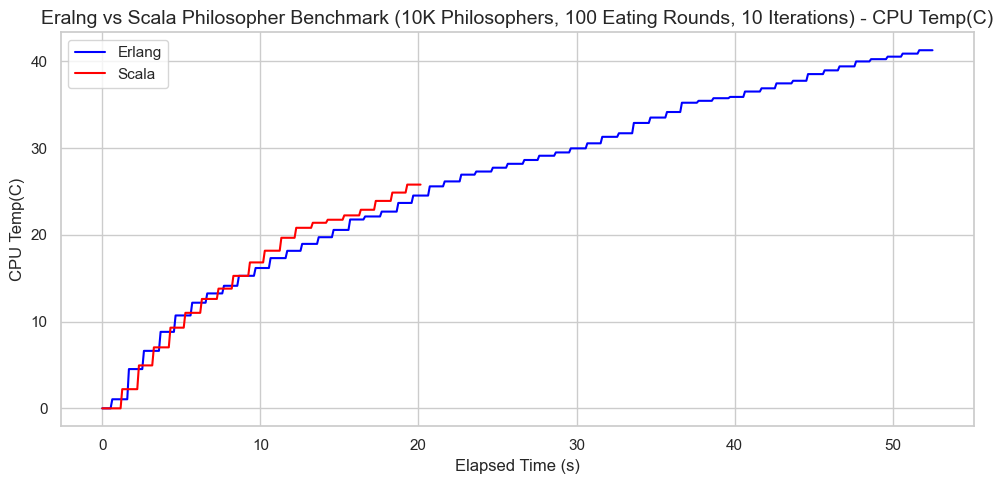

In [18]:
plot_erlang_vs_scala(erlang_bench_data, scala_bench_data, erlang_idle_data, scala_idle_data, f"Eralng vs Scala Philosopher Benchmark {title_config_prefix}")


Compute Average Metrics

In [19]:
metrics_columns = ["CPU Core Power(W)", "GT Power(W)", "DRAM Power(W)", "(CPUs+GT+SA) Power(W)","CPU Temp(C)", "Avg Num Cores Active"]

In [20]:
# Compute mean idle values for each metric
scala_idle_means = scala_idle_data[metrics_columns].mean()
erlang_idle_means = erlang_idle_data[metrics_columns].mean()

# Subtract the mean idle values from each row in the benchmark data
scala_net_avgs = (scala_bench_data[metrics_columns] - scala_idle_means).mean()
erlang_net_avgs = (erlang_bench_data[metrics_columns] - erlang_idle_means).mean()

print("Net Average Metrics Comparison:\n")
print("Scala Benchmark:")
print(scala_net_avgs, "\n")
print("Erlang Benchmark:")
print(erlang_net_avgs)

Net Average Metrics Comparison:

Scala Benchmark:
CPU Core Power(W)        34.171127
GT Power(W)               0.007961
DRAM Power(W)             0.336335
(CPUs+GT+SA) Power(W)    36.505632
CPU Temp(C)              15.381176
Avg Num Cores Active      3.781860
dtype: float64 

Erlang Benchmark:
CPU Core Power(W)        24.316677
GT Power(W)               0.004024
DRAM Power(W)             0.326195
(CPUs+GT+SA) Power(W)    26.500731
CPU Temp(C)              26.503285
Avg Num Cores Active      3.086122
dtype: float64


Compute Total Energy Consumption

In [21]:
# Calculate total elapsed time
scala_total_time = scala_bench_data["Time Elapsed (ms)"].sum() / 1000
erlang_total_time = erlang_bench_data["Time Elapsed (ms)"].sum() / 1000

# Calculate total elapsed time using timestamps (convert to seconds)
# scala_total_time = (scala_bench_data["Timestamp"].iloc[-1] - scala_bench_data["Timestamp"].iloc[0]).total_seconds()
# erlang_total_time = (erlang_bench_data["Timestamp"].iloc[-1] - erlang_bench_data["Timestamp"].iloc[0]).total_seconds()

# Compute total energy consumption
scala_total_energy = scala_net_avgs["(CPUs+GT+SA) Power(W)"] * scala_total_time
erlang_total_energy = erlang_net_avgs["(CPUs+GT+SA) Power(W)"] * erlang_total_time

# Create a DataFrame for the new row
new_row = pd.DataFrame([{
    "Iterations": ITERATIONS,
    "N": N,
    "M": M,
    "Erlang Energy Consumption(J)": erlang_total_energy,
    "Scala Energy Consumption(J)": scala_total_energy
}])

# Define CSV file path
csv_filename = os.path.join(parent_dir, "aggregate_energy_results.csv")

# Check if the file exists
if os.path.exists(csv_filename):
    # Load existing data
    existing_data = pd.read_csv(csv_filename)
    
    # Check if the row with the same (Number of Messages, Iterations) already exists
    duplicate_row = existing_data[
        (existing_data["N"] == N) & 
        (existing_data["M"] == M) &
        (existing_data["Iterations"] == ITERATIONS)
    ]
    
    if not duplicate_row.empty:
        print("Skipping duplicate entry for N =", N, "M =", M, "and Iterations =", ITERATIONS)
    else:
        # Append new row
        new_row.to_csv(csv_filename, mode='a', header=False, index=False)
        print("Results appended to", csv_filename)
else:
    # Save with header if file does not exist
    new_row.to_csv(csv_filename, mode='w', header=True, index=False)
    print("File created and results saved to", csv_filename)

# Print the computed values
print("\nTotal Energy Consumption Comparison:")
print("Scala Benchmark:", scala_total_energy,"Joules")
print("Erlang Benchmark:", erlang_total_energy,"Joules")


Results appended to ../../data/philosopher/aggregate_energy_results.csv

Total Energy Consumption Comparison:
Scala Benchmark: 738.8882313934196 Joules
Erlang Benchmark: 1394.515612258443 Joules
